In [86]:
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [87]:
train = pd.read_csv('/content/drive/MyDrive/colab/train.csv')
test = pd.read_csv('/content/drive/MyDrive/colab/test.csv')

train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [88]:
    # 가져온 데이터의 특성에서 class라는 문자열이 있으면 feature, target 나누기
def get_x_y(df):
  if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class', 'father', 'mother', 'gender'])    # feature 뽑기
        df_y = df['class']                         # target 뽑기
        return df_x, df_y
  else:
        df_x = df.drop(columns=['id', 'father', 'mother', 'gender'])
        return df_x


In [89]:
train_x, train_y = get_x_y(train)     # train - feature, target 나누기 
test_x = get_x_y(test)              # test - feature 뽑기          
train_x

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A
1,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A
2,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A
3,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G
4,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2,A G,A G,A A,G A,C C,A G,A A,G A,A A,G G,A G,G A,A A,A A,A A
258,2,G G,A A,C A,A A,A A,A G,G A,G A,A A,A G,A G,A A,A G,A A,G A
259,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A A,G G,G G,G G,C A,G G
260,1,A A,G G,A A,G A,A A,G G,G G,A A,G A,A G,A G,G A,G G,C A,G G


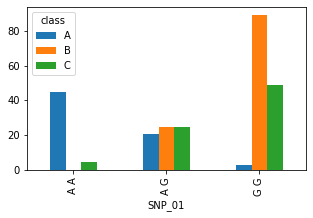

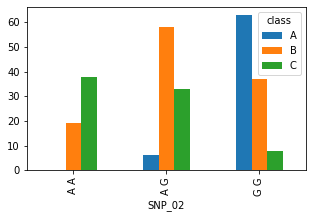

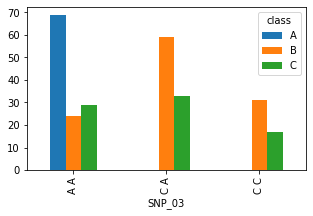

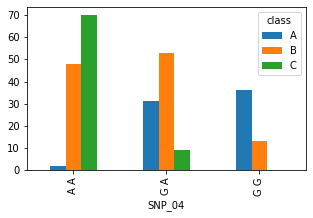

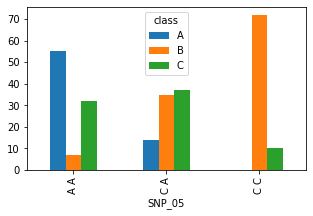

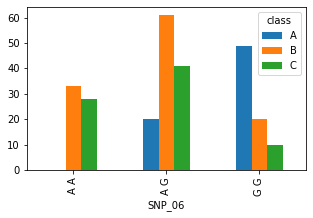

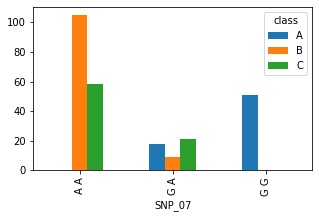

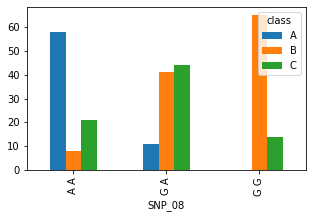

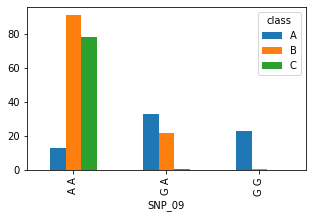

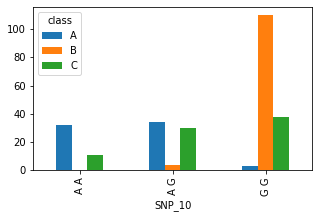

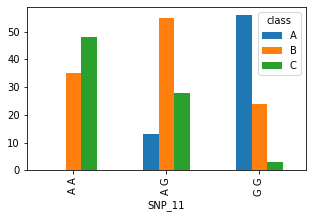

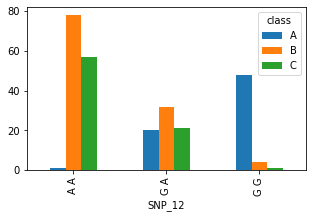

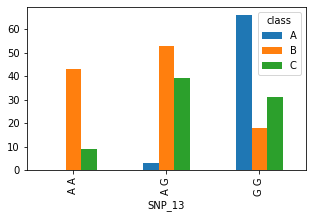

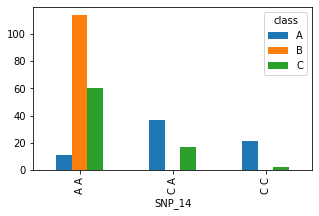

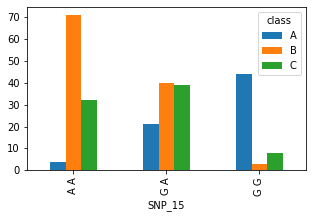

In [90]:
for g in train.columns[train.columns.str.contains('SNP')].tolist():
    train.groupby(g)['class'].value_counts().unstack().plot.bar(figsize=(5,3));

In [91]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()

snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]
snp_col       # 속성을 가져오기 위해 문자열 처리, 속성이름 리스트

['SNP_01',
 'SNP_02',
 'SNP_03',
 'SNP_04',
 'SNP_05',
 'SNP_06',
 'SNP_07',
 'SNP_08',
 'SNP_09',
 'SNP_10',
 'SNP_11',
 'SNP_12',
 'SNP_13',
 'SNP_14',
 'SNP_15']

In [93]:
snp_data = []

for col in snp_col:
    snp_data += list(train_x[col].values)

snp_data     # 모든 속성들의 값 리스트로 합쳐놓은 거

['G G',
 'A G',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'A G',
 'G G',
 'A A',
 'A A',
 'A G',
 'A A',
 'G G',
 'G G',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'A G',
 'G G',
 'A A',
 'G G',
 'A G',
 'A A',
 'A A',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'A A',
 'G G',
 'A A',
 'A A',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'A A',
 'A A',
 'G G',
 'A A',
 'G G',
 'A A',
 'A A',
 'A G',
 'A G',
 'A A',
 'G G',
 'A A',
 'G G',
 'G G',
 'A G',
 'A G',
 'A A',
 'A G',
 'G G',
 'A G',
 'G G',
 'G G',
 'G G',
 'A A',
 'A G',
 'G G',
 'A G',
 'A G',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'A G',
 'A A',
 'A G',
 'A G',
 'A G',
 'G G',
 'A G',
 'G G',
 'A A',
 'A G',
 'G G',
 'G G',
 'G G',
 'A G',
 'G G',
 'G G',
 'A G',
 'A G',
 'G G',
 'G G',
 'G G',
 'A A',
 'A G',
 'A G',
 'G G',
 'G G',
 'G G',
 'A G',
 'A A',


In [94]:
train_y = class_le.fit_transform(train_y)       # A - 0, B - 1, C - 2   target label encoding
snp_le.fit(snp_data)
train_y

array([1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0,
       1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1])

In [95]:
for col in train_x.columns:                 # feature label encoding 
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

train_x               # 범주형 데이터 Label Encoding

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,2,5,1,0,4,2,0,0,5,0,5,1,0,0,0,0
1,2,1,1,2,0,0,1,0,4,0,1,0,4,5,0,0
2,2,5,5,0,4,3,5,0,4,4,1,0,0,0,0,0
3,1,0,5,0,4,0,5,5,0,5,1,5,5,5,0,5
4,2,5,5,3,0,3,0,0,0,0,5,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2,1,1,0,4,3,1,0,4,0,5,1,4,0,0,0
258,2,5,0,2,0,0,1,4,4,0,1,1,0,1,0,4
259,1,1,5,0,4,0,1,5,4,4,0,5,5,5,2,5
260,1,0,5,0,4,0,5,5,0,4,1,1,4,5,2,5


In [96]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=4)      # train, test 데이터 나누기

In [166]:
result = []

# 랜덤 포레스트를 이용한 결과

In [106]:
clf = RandomForestClassifier(random_state=42)           # RandomForestClassifier(random_state=42) 보편적으로 42
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [167]:
print(f'랜덤포레스트 모델의 정확도는 {clf.score(X_test, y_test)}')
result.append(clf.score(X_test, y_test))

랜덤포레스트 모델의 정확도는 0.9620253164556962


# 결정 트리를 이용한 결과

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
max = 0.0
index = 1

for i in range(1, 10):
  D_clf = DecisionTreeClassifier(max_depth = i, random_state=42).fit(X_train, y_train)
  print(f'결정 트리 모델(max_depth={i})의 정확도는 {D_clf.score(X_test, y_test)}')
  if max < D_clf.score(X_test, y_test):
    max = D_clf.score(X_test, y_test)
    index = i

print('\n')
print(f'max_depth = 1 ~ 10 중 가장 높은 정확도는 {max}')
result.append(max)

결정 트리 모델(max_depth=1)의 정확도는 0.7341772151898734
결정 트리 모델(max_depth=2)의 정확도는 0.8734177215189873
결정 트리 모델(max_depth=3)의 정확도는 0.8987341772151899
결정 트리 모델(max_depth=4)의 정확도는 0.8987341772151899
결정 트리 모델(max_depth=5)의 정확도는 0.8860759493670886
결정 트리 모델(max_depth=6)의 정확도는 0.8860759493670886
결정 트리 모델(max_depth=7)의 정확도는 0.8734177215189873
결정 트리 모델(max_depth=8)의 정확도는 0.8860759493670886
결정 트리 모델(max_depth=9)의 정확도는 0.8734177215189873


max_depth = 1 ~ 10 중 가장 높은 정확도는 0.8987341772151899


# KNN을 이용한 결과

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [204]:
max = 0.0
index2 = 1

for i in range(1, 10):  
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(X_train, y_train)

  print(f'KNN 모델(n_neighbors = {i})의 정확도는 {kn.score(X_test, y_test)}')
  if max < kn.score(X_test, y_test):
    max = kn.score(X_test, y_test)
    index2 = i

print('\n')
print(f'n_neighbors = 1 ~ 10 중 가장 높은 정확도는 {max}')
result.append(max)

KNN 모델(n_neighbors = 1)의 정확도는 0.9113924050632911
KNN 모델(n_neighbors = 2)의 정확도는 0.9746835443037974
KNN 모델(n_neighbors = 3)의 정확도는 0.9493670886075949
KNN 모델(n_neighbors = 4)의 정확도는 0.9240506329113924
KNN 모델(n_neighbors = 5)의 정확도는 0.9493670886075949
KNN 모델(n_neighbors = 6)의 정확도는 0.9367088607594937
KNN 모델(n_neighbors = 7)의 정확도는 0.9493670886075949
KNN 모델(n_neighbors = 8)의 정확도는 0.9493670886075949
KNN 모델(n_neighbors = 9)의 정확도는 0.9746835443037974


n_neighbors = 1 ~ 10 중 가장 높은 정확도는 0.9746835443037974


# 로지스틱 회귀 모델을 통한 분류 결과

In [127]:
from sklearn.linear_model import LogisticRegression

In [170]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(f'로지스틱 회귀를 통한 분류 모델의 정확도는 {lr.score(X_test, y_test)}')
result.append(lr.score(X_test, y_test))

로지스틱 회귀를 통한 분류 모델의 정확도는 0.9620253164556962


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


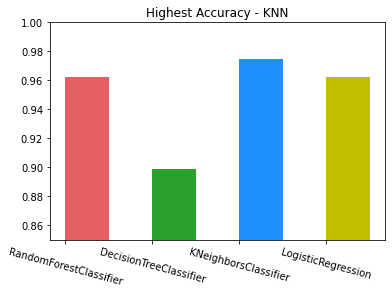

In [195]:
x = np.arange(4)
years = ['RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression']
values = [100, 400, 900]

plt.bar(x, result, color=['#e35f62', 'C2', 'dodgerblue', 'y'], width=0.5, align='edge')
plt.xticks(x, years, rotation=-15)

plt.ylim([0.85, 1.0])
plt.title('Highest Accuracy - KNN')
plt.show()

In [197]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [210]:
result2 = [result[0]]

[0.9620253164556962]

In [211]:
score = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
print(f'랜덤포레스트 교차검증 평균{score.mean()}')
result2.append(score.mean())

랜덤포레스트 교차검증 평균0.9397897897897899


[0.9620253164556962, 0.9397897897897899]

In [212]:
result2.append(result[1])
result2

[0.9620253164556962, 0.9397897897897899, 0.8987341772151899]

In [213]:
score = cross_val_score(DecisionTreeClassifier(max_depth = index, random_state=42), X_train, y_train, scoring='accuracy', cv=5)
print(f'결정 트리 교차검증 평균{score.mean()}')
result2.append(score.mean())

결정 트리 교차검증 평균0.8852852852852852


In [214]:
result2.append(result[2])
result2

[0.9620253164556962,
 0.9397897897897899,
 0.8987341772151899,
 0.8852852852852852,
 0.9746835443037974]

In [215]:
score = cross_val_score(KNeighborsClassifier(n_neighbors=index2), X_train, y_train, scoring='accuracy', cv=5)
print(f'KNN 교차검증 평균{score.mean()}')
result2.append(score.mean())

KNN 교차검증 평균0.884984984984985


In [216]:
result2.append(result[3])
result2

[0.9620253164556962,
 0.9397897897897899,
 0.8987341772151899,
 0.8852852852852852,
 0.9746835443037974,
 0.884984984984985,
 0.9620253164556962]

In [217]:
score = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=5)
print(f'로지스틱 회귀 교차검증 평균{score.mean()}')
result2.append(score.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

로지스틱 회귀 교차검증 평균0.9231231231231231


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


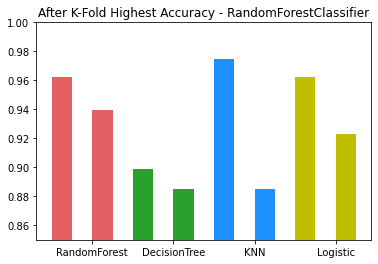

In [230]:
x = np.arange(8)

years = ['RandomForest','DecisionTree', 'KNN', 'Logistic']
values = [100, 400, 900]

plt.bar(x, result2, color=['#e35f62', '#e35f62', 'C2', 'C2', 'dodgerblue', 'dodgerblue', 'y', 'y'], width=0.5, align='edge')
plt.xticks((1, 3, 5, 7), years)

plt.ylim([0.85, 1.0])
plt.title('After K-Fold Highest Accuracy - RandomForestClassifier')
plt.show()

- 데이터 개수가 부족하기 때문에 교차검증을 하는 것이 성능개선에 효과가 없다.